# MAST387 Assignment 4

## Tristan Lafleur (40245238)



## Question 1: Classification using two methods.



P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  In the above reference, two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
  between 0 (very bad) and 10 (very excellent). Now, you are working in a worldwide Liquor store - VinoVault, as a data scientist. Your boss thinks it is toooo expensive to hire wine experts to rate the wine quality, he/she is willing to pay you more bonus ($ 1 million) to build a crazy model to rate red wines, so that he/she can make a decision of prices and storages. Here, I give you the red wine quality dataset, you are going to build two classfication models to classify these red wines to their quality classes. The feature information is as follows.

  Attribute information:

   For more information, if you are interested, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   
   1. - fixed acidity
   2. - volatile acidity
   3. - citric acid
   4. - residual sugar
   5. - chlorides
   6. - free sulfur dioxide
   7. - total sulfur dioxide
   8. - density
   9. - pH
   10. - sulphates
   11. - alcohol
         
   Output variable (based on sensory data): 
   
   12. - quality (score between 0 and 10)
  
  
  
  
  
  
  Remember:

  1. Your boss do not know math or statistics, he/she won't pay you anything if he/she does not know what you are doing. Visualization is your friend.
  2. I already pre-process your data, but you still need to pre-process it to make it useful.
  3. Make sure to comments your code or code cells, for example, you should comment like: ## Here I work on data pre-processing.
  4. Give model evaluations like confusion matrix and so on.
  5. Make comparsion for your two models.


In [1]:
import pandas
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid
from sklearn import metrics

column_names = ["fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density","pH","sulphates","alcohol","quality"]


#### Preprocessing Steps and Verification

In [166]:
# [MAST387-Assignment-4]: No header was found in the csv, would cause issues in the data frame therefore add a list of strings in.
wine_dataframe = pandas.read_csv("winequality-red.csv", names=column_names)
wine_dataframe


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [167]:
# [MAST387-Assignment-4]:Checking to see if describe gives us any statistics that seem off due to sentinel values
wine_dataframe.describe()


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [168]:
# [MAST387-Assignment-4]:Checking to see if any NAN values exist that need to be replaced
wine_dataframe.isna().sum()


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Data Exploration and Visualizations

- According to [Kaggle](https://www.kaggle.com/datasets/danielpanizzo/wine-quality) the features of the dataset can be described as such
    - Fixed Acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
    - Volatile Acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
    - Citric Acid: found in small quantities, citric acid can add 'freshness' and flavor to wines
    - Residual Sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
    - Chlorides: the amount of salt in the wine
    - Free Sulfur Dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
    - Total Sulfur Dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
    - Density: the density of water is close to that of water depending on the percent alcohol and sugar content
    - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

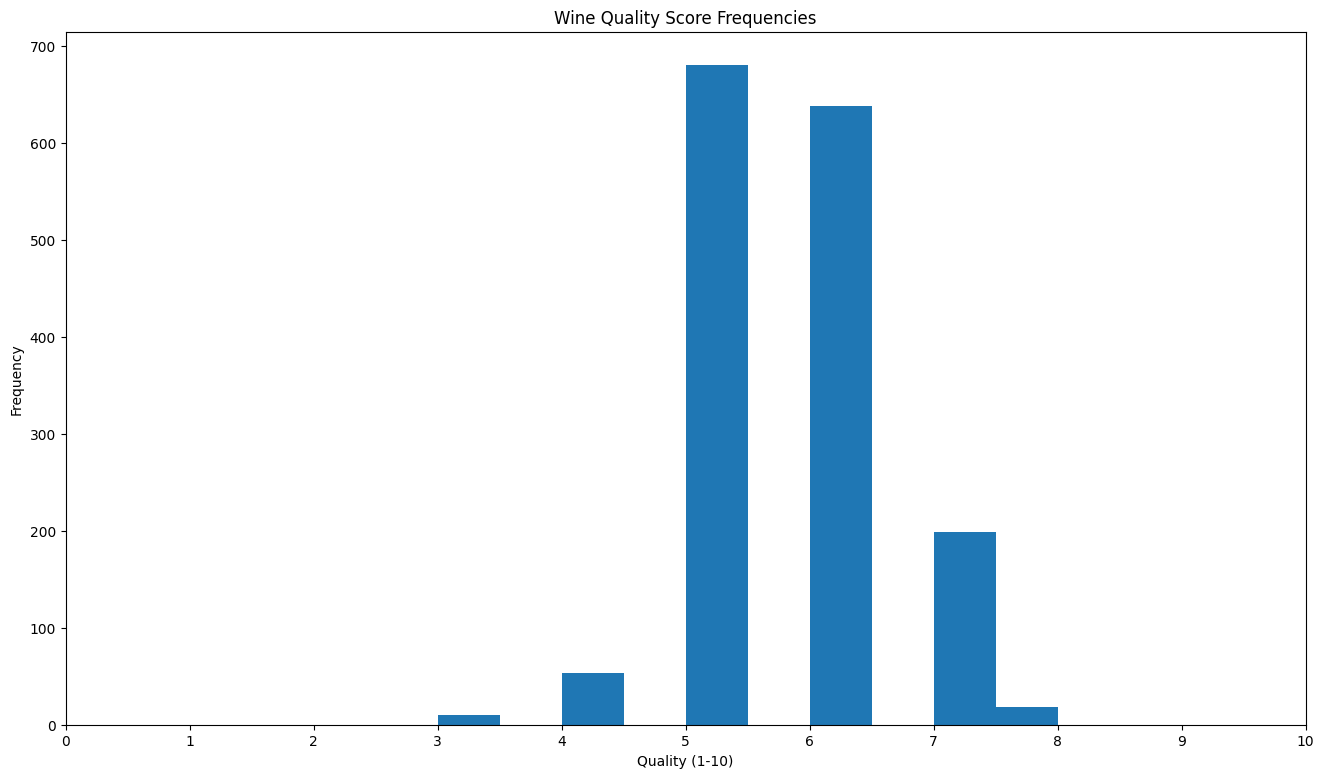

In [169]:
plt.figure(figsize=(16,9))

plt.hist(wine_dataframe.quality.to_numpy())

plt.xlabel("Quality (1-10)")
plt.xticks(range(0,11))
plt.ylabel("Frequency")
plt.title("Wine Quality Score Frequencies")

plt.show()


- Typically, the quality of the wine tends to be scored at 5 or 6 out of 10 and there tends to be a greater quantity of good wines than bad.

In [170]:
wine_quality_groups_dataframe = wine_dataframe.groupby("quality").mean()
wine_quality_groups_dataframe


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
quality                                                                 
3             8.360000          0.884500     0.171000        2.635000   
4             7.779245          0.693962     0.174151        2.694340   
5             8.167254          0.577041     0.243686        2.528855   
6             8.347179          0.497484     0.273824        2.477194   
7             8.872362          0.403920     0.375176        2.720603   
8             8.566667          0.423333     0.391111        2.577778   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
quality                                                                   
3         0.122500            11.000000             24.900000  0.997464   
4         0.090679            12.264151             36.245283  0.996542   
5         0.092736            16.983847             56.513950  0.997104   
6         0.084956            15.711599             40.869906  0.996615   
7         0.076588            14.045226             35.020101  0.996104   
8         0.068444            13.277778             33.444444  0.995212   

               pH  sulphates    alcohol  
quality                                  
3        3.398000   0.570000   9.955000  
4        3.381509   0.596415  10.265094  
5        3.304949   0.620969   9.899706  
6        3.318072   0.675329  10.629519  
7        3.290754   0.741256  11.465913  
8        3.267222   0.767778  12.094444

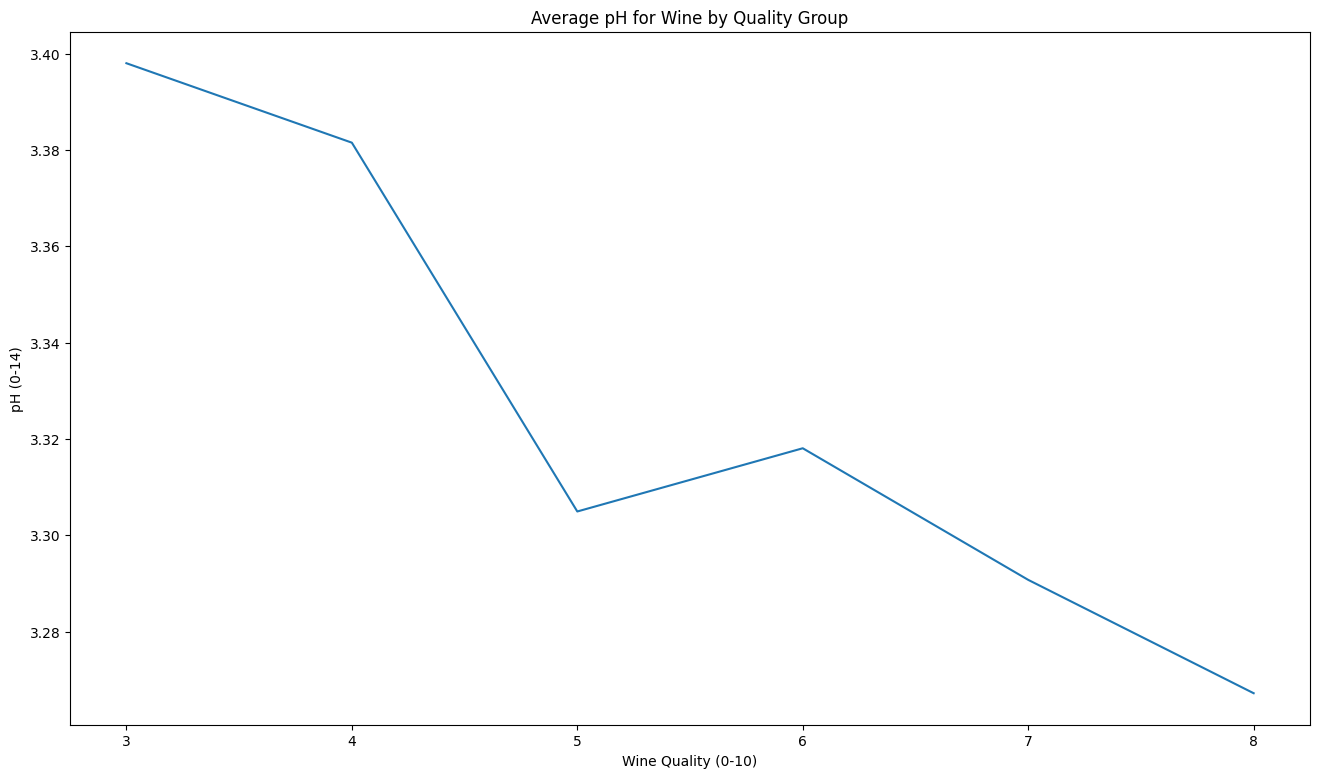

In [171]:
plt.figure(figsize=(16,9))

plt.plot(list(wine_quality_groups_dataframe.index), wine_quality_groups_dataframe.pH)

plt.xlabel("Wine Quality (0-10)")
plt.ylabel("pH (0-14)")
plt.title("Average pH for Wine by Quality Group")

plt.show()


- From the plot it looks like better quality wine typically has a lower pH

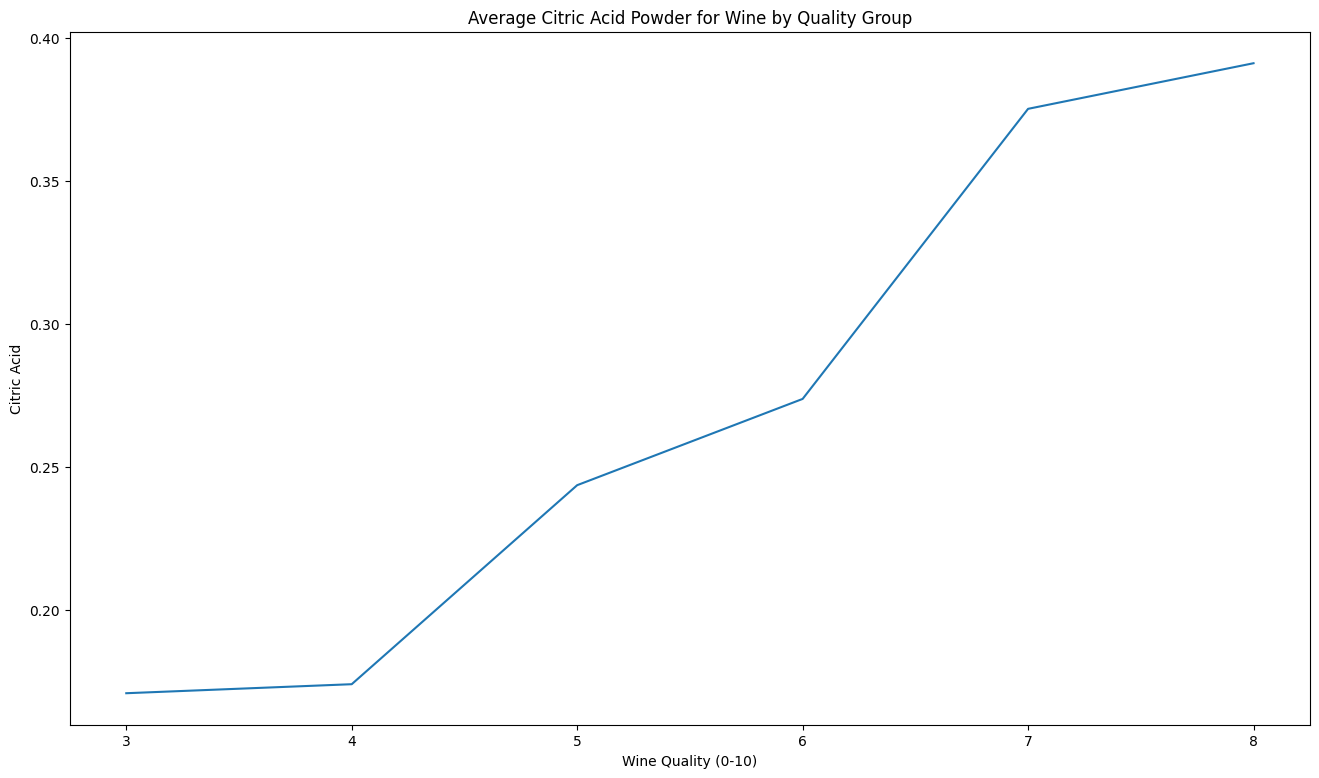

In [172]:
plt.figure(figsize=(16,9))

plt.plot(list(wine_quality_groups_dataframe.index), wine_quality_groups_dataframe.citric_acid)

plt.xlabel("Wine Quality (0-10)")
plt.ylabel("Citric Acid")
plt.title("Average Citric Acid Powder for Wine by Quality Group")

plt.show()


- From the plot above it looks like higher quality wines tend to carry more citric acid 

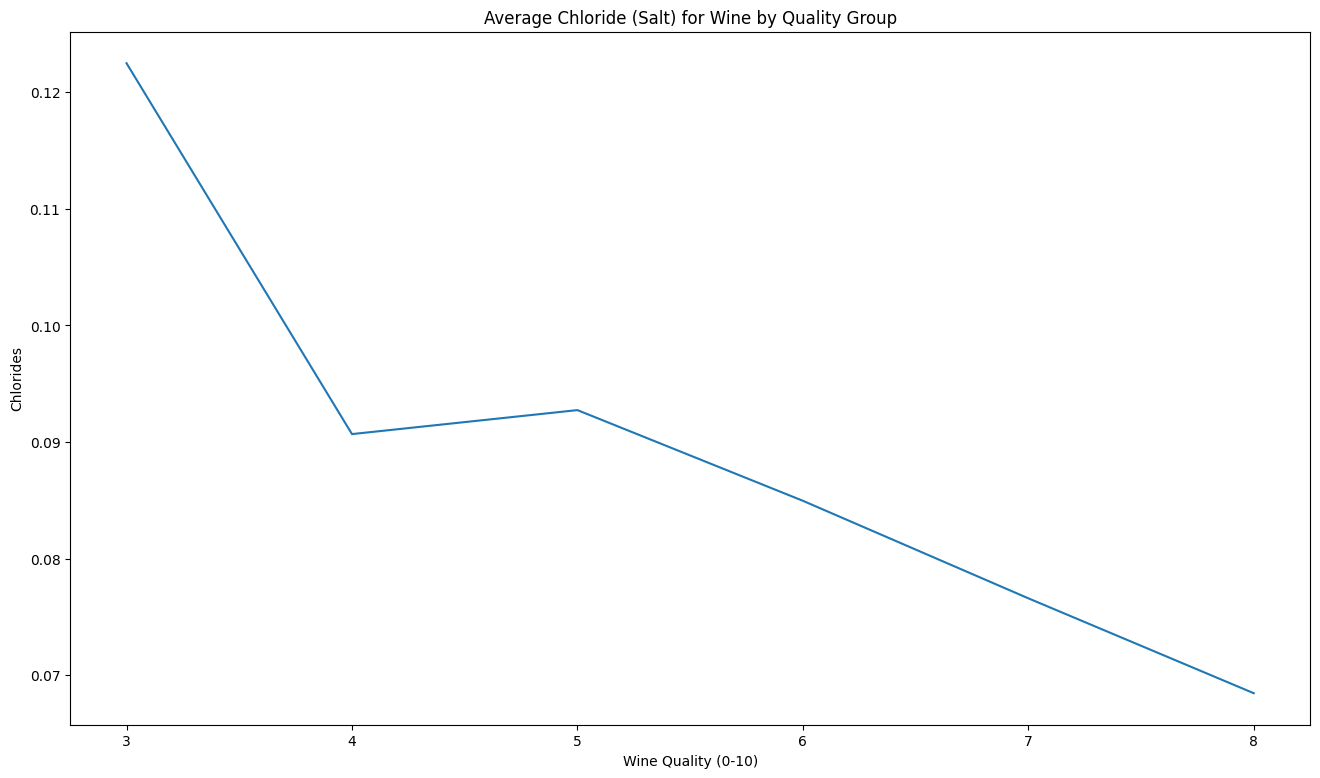

In [173]:
plt.figure(figsize=(16,9))

plt.plot(list(wine_quality_groups_dataframe.index), wine_quality_groups_dataframe.chlorides)

plt.xlabel("Wine Quality (0-10)")
plt.ylabel("Chlorides")
plt.title("Average Chloride (Salt) for Wine by Quality Group")

plt.show()



- Once more, we can see a downward trend in salt for higher quality wines

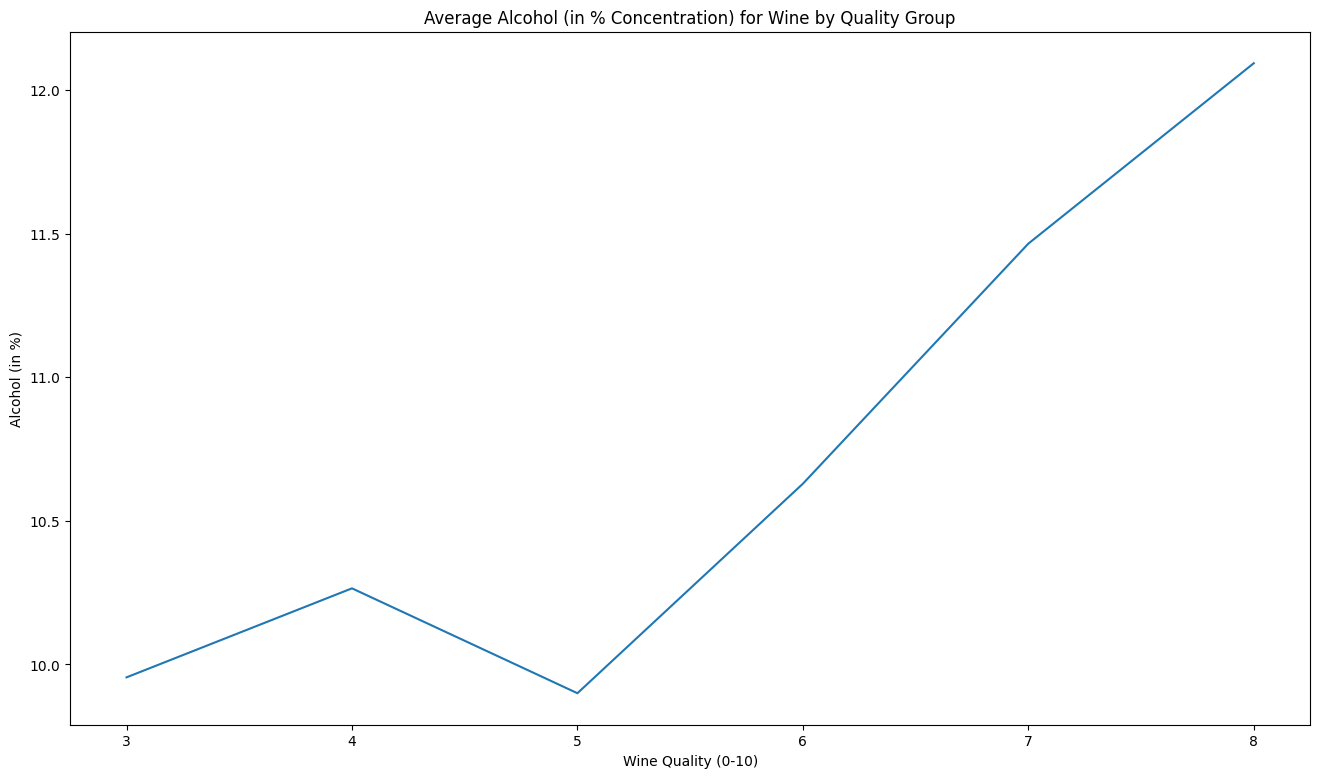

In [174]:
plt.figure(figsize=(16,9))

plt.plot(list(wine_quality_groups_dataframe.index), wine_quality_groups_dataframe.alcohol)

plt.xlabel("Wine Quality (0-10)")
plt.ylabel("Alcohol (in %)")
plt.title("Average Alcohol (in % Concentration) for Wine by Quality Group")

plt.show()


- Finally, higher quality wines tend to have more alcohol concentration in the wine

#### Models

In [175]:
data = wine_dataframe.drop("quality", axis=1)

target = wine_dataframe.quality

data[data.columns] = StandardScaler().fit_transform(data.to_numpy())

pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(data.to_numpy())
dataset_pca = pandas.DataFrame(abs(pca_2.components_), columns=data.columns, index=['PC_1', 'PC_2'])
dataset_pca


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
PC_1       0.489314          0.238584     0.463632        0.146107   0.212247   
PC_2       0.110503          0.274930     0.151791        0.272080   0.148052   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
PC_1             0.036158              0.023575  0.395353  0.438520   
PC_2             0.513567              0.569487  0.233575  0.006711   

      sulphates   alcohol  
PC_1   0.242921  0.113232  
PC_2   0.037554  0.386181

- Important features (> .3) for PC 1 are
    - Fixed Acidity
    - Citric Acid
    - Density
    - pH

- Important Features for PC 2 are
    - Volatile Acidity
    - Total Sulfur Dioxide
    - Density
    - Alcohol
    - Quality

In [148]:
# [MAST387-Assignment-4]: Since the data makes it so there contains very few sample for certain labels, we need to stratify the data
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

data = wine_dataframe.drop("quality", axis=1).to_numpy()

target = wine_dataframe.quality.to_numpy()

train_data = None

test_data = None

train_target = None

test_target = None

for train_index, test_index in skf.split(data, target):
    train_data, test_data = data[train_index], data[test_index]
    train_target, test_target = target[train_index], target[test_index]

    break


- ***Random Forest Model***

In [81]:
random_forest_model = RandomForestClassifier(random_state=42)


In [92]:
random_forest_model.fit(train_data, train_target)


RandomForestClassifier(random_state=42)

In [93]:
print(classification_report(test_target, random_forest_model.predict(test_data)))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        18
           5       0.67      0.80      0.73       227
           6       0.64      0.63      0.64       213
           7       0.71      0.55      0.62        66
           8       1.00      0.17      0.29         6

    accuracy                           0.66       533
   macro avg       0.50      0.36      0.38       533
weighted avg       0.64      0.66      0.65       533



- ***Logistic Regression Model***

In [108]:
log_reg_model = LogisticRegression(random_state=42)


In [109]:
log_reg_model.fit(train_data, train_target)


c:\Users\Trim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [110]:
print(classification_report(test_target, log_reg_model.predict(test_data)))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        18
           5       0.63      0.79      0.70       227
           6       0.52      0.61      0.56       213
           7       0.00      0.00      0.00        66
           8       0.00      0.00      0.00         6

    accuracy                           0.58       533
   macro avg       0.19      0.23      0.21       533
weighted avg       0.48      0.58      0.52       533



c:\Users\Trim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Trim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Trim\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

## Question 2: Clustering using k-means

Ok, you are doing great! You almost win that bonus. Your boss thinks the wine quality column in your dataset is not realiable, since it is based on some experts. He wants to know if there is a way to cluster these wines based on some similarities. Here you can try to use the k-means to cluster your data (remember to not use the quality column to fit your k-means model and use this column as a test).

Parameter: {'n_clusters': 2} Score 0.206963188071496
Parameter: {'n_clusters': 3} Score 0.16945053263773174
Parameter: {'n_clusters': 4} Score 0.17159692108737837
Parameter: {'n_clusters': 5} Score 0.161143428954663
Parameter: {'n_clusters': 10} Score 0.1368337984521293
Parameter: {'n_clusters': 15} Score 0.12219971491576376
Parameter: {'n_clusters': 20} Score 0.1359916542838942
Parameter: {'n_clusters': 25} Score 0.13541004254109534
Parameter: {'n_clusters': 30} Score 0.13291522409746143
Parameter: {'n_clusters': 35} Score 0.140960655354971
Parameter: {'n_clusters': 40} Score 0.13500824904789827


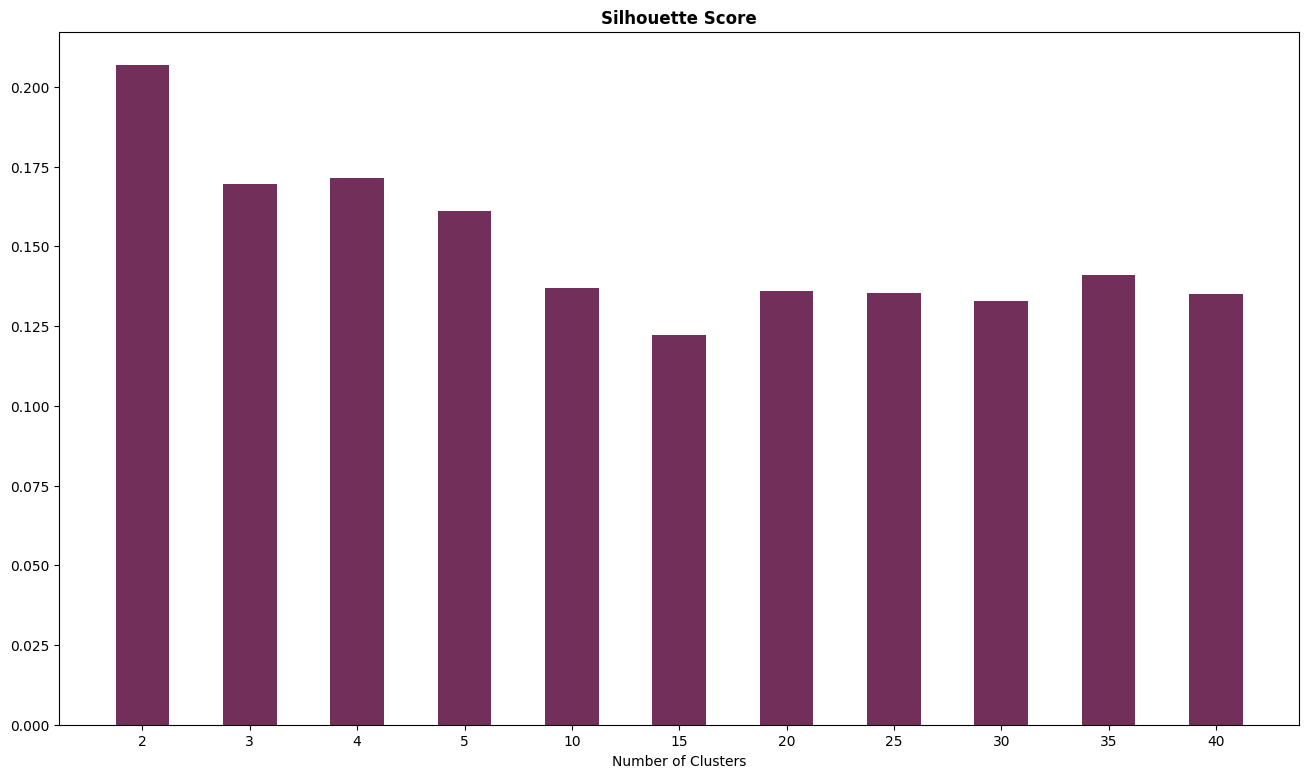

In [176]:
parameters = [2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40]
parameter_grid = ParameterGrid({'n_clusters': parameters})

best_score = -1

best_grid = -1

kmeans_model = KMeans()     # instantiating KMeans model

silhouette_scores = []

for p in parameter_grid:
    kmeans_model.set_params(**p)    # set current hyper parameter
    
    kmeans_model.fit(data)          # fit model on wine dataset, this will find clusters based on parameter p
    
    ss = metrics.silhouette_score(data, kmeans_model.labels_)   # calculate silhouette_score
    silhouette_scores += [ss]       # store all the scores
    print('Parameter:', p, 'Score', ss)
    
    if ss > best_score:
        best_score = ss
        best_grid = p

plt.figure(figsize=(16,9))

plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)

plt.xticks(range(len(silhouette_scores)), list(parameters))
plt.title('Silhouette Score', fontweight='bold')
plt.xlabel('Number of Clusters')

plt.show()


In [177]:
#code here
kmeans = KMeans(best_grid["n_clusters"], random_state=42)


In [178]:
kmeans.fit(data.to_numpy())
centroids = kmeans.cluster_centers_
pca_centroids = pca_2.transform(centroids)


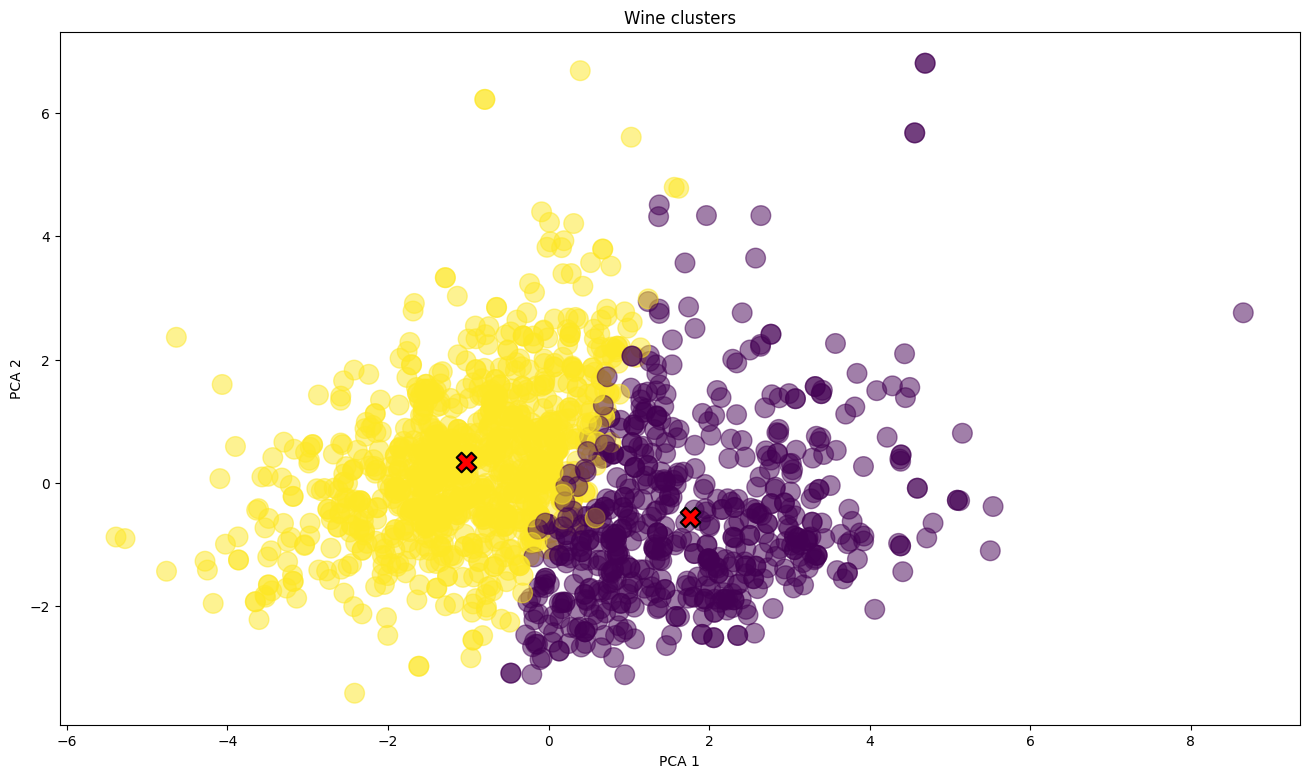

In [ ]:
x = pca_2_result[:, 0]
y = pca_2_result[:, 1]

plt.figure(figsize=(16,9))

plt.scatter(x, y, c=kmeans.labels_, alpha=0.5, s=200)  # plot different colors per cluster

plt.title('Wine clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.scatter(pca_centroids[:, 0], pca_centroids[:, 1], marker='X', s=200, color='red', edgecolors="black", lw=1.5)

plt.show()


Bravo! You are the winner!